In [36]:
import bs4 as bs # import beautifulsoup
import urllib.request # to open link
import pandas as pd
import numpy as np
import os
from PIL import Image
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [95]:
curr_dir = os.getcwd()
tar_dir = curr_dir + '/data/clean'

In [96]:
file = os.listdir(tar_dir)[0]
path = tar_dir + '/' + file

In [23]:
df = pd.read_csv(path, sep=';',error_bad_lines=False)
df.head()

b'Skipping line 17709: expected 10 fields, saw 11\nSkipping line 18724: expected 10 fields, saw 11\nSkipping line 24832: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,XIOMARAPINAR2,2017-04-21 19:44,0,0,Somos el 95% de OPOSITORES el CNE lo q tiene q...,NaN,NaN,#,8.555678e+17,https://twitter.com/XIOMARAPINAR2/status/85556...
1,desdevargas,2017-04-21 17:37,1,1,# 19VzlaEnLaCalle y en los puntos rojos de Var...,NaN,@CuatroFDigital @,#,8.555359e+17,https://twitter.com/desdevargas/status/8555359...
2,incesamazonas,2017-04-21 16:38,0,0,Retweeted ANTV VENEZUELA (@ANTV_VENEZUELA): # ...,NaN,@ANTV_VENEZUELA,# #,8.555210e+17,https://twitter.com/incesamazonas/status/85552...
3,incesamazonas,2017-04-21 16:28,0,0,Retweeted Elias Jaua ( @ JauaMiranda): # 19vzl...,NaN,@,#,8.555187e+17,https://twitter.com/incesamazonas/status/85551...
4,FreeCubaVzla,2017-04-21 14:13,0,0,Retweeted Mando Militar ( @ MandoMilitar): # 1...,NaN,@,#,8.554845e+17,https://twitter.com/FreeCubaVzla/status/855484...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 10 columns):
username     24996 non-null object
date         24996 non-null object
retweets     24996 non-null int64
favorites    24996 non-null int64
text         24996 non-null object
geo          41 non-null object
mentions     4222 non-null object
hashtags     24955 non-null object
id           24955 non-null float64
permalink    24955 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


In [141]:
tweets = " ".join(tweet for tweet in df.text)

### Clean data

In [103]:
# df_sample = df[:100]
# tweets = " ".join(tweet for tweet in df_sample.text)

'Somos el 95% de OPOSITORES el CNE lo q tiene q redactar es credenciales y acta q elecciones si no hacen falta # 19VzlaEnLaCalle # 19VzlaEnLaCalle y en los puntos rojos de Vargas en defensa de la revolución con periódico 4f. @CuatroFDigital @ CarneiroPSUVpic.twitter.com/iFIQhyt4FK Retweeted ANTV VENEZUELA (@ANTV_VENEZUELA): # 19VzlaEnLaCalle El # 19Abr el Pueblo con paz toma Caracas y... http://fb.me/606ll7gK6 Retweeted Elias Jaua ( @ JauaMiranda): # 19vzlaenlacalle logró el triunfo de la Independencia y La Paz. Un día de... http://fb.me/2UArRH7XL Retweeted Mando Militar ( @ MandoMilitar): # 19vzlaenlacalle Momento cuando las personas son obligadas a cruzar el... http://fb.me/8lrOdMnWO Dastis: el plan militar de Maduro no es una buena indicación" http://bit.ly/2oO4mMU # 19VzlaEnLaCalle pic.twitter.com/JqOjhHin14" # TV Siga # envivo las incidencias de este # 19EnMarcha en # Venezuela http://bit.ly/2pBCoqr # 19VzlaEnLaCalle pic.twitter.com/gDI1PnsnvN Retweeted Anonymous Lara ( @ LaraAnon

Change accented text to plain text

In [142]:
no_accents = re.sub(r'é', 'e', tweets)
no_accents = re.sub(r'á', 'a', no_accents)
no_accents = re.sub(r'ó', 'o', no_accents)
no_accents = re.sub(r'í', 'i', no_accents)
no_accents = re.sub(r'ñ', 'n', no_accents)
no_accents = re.sub(r'ú', 'u', no_accents)

Remove symbols, links, unicode, pictwitter


In [143]:
no_links = re.sub(r'http\S+', '', no_accents)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
no_pic = re.sub("pictwitter\w*", '', no_special_characters)

In [144]:
tweets_clean = no_pic
tweets_clean = tweets_clean.lower()

### Stop words <br>
Because the text is in Spanish, I utilized a Spanish set of stop words that was found in the Python package stop-words.

In [145]:
from stop_words import get_stop_words

stopwords = set(STOPWORDS)
spanish_words = get_stop_words('spanish')
spanish_words.append('retweeted')
stopwords.update(spanish_words)

Plot wordcloud

In [146]:
wordcloud = WordCloud(stopwords=stopwords, min_font_size = 8, max_font_size=100, 
                      max_words=200,colormap="Reds", contour_width = 1, 
                      contour_color = "Red",collocations = False,
                      background_color="white").generate(tweets_clean)

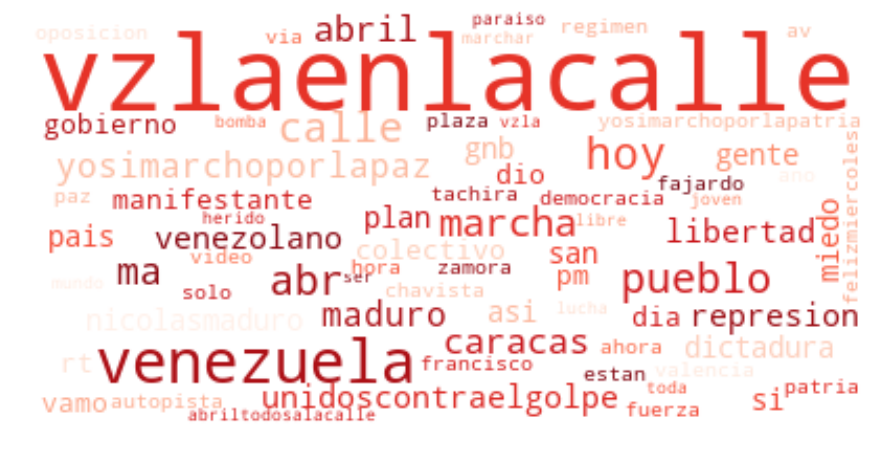

In [147]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

Without Hashtags

In [152]:
no_hashtags = re.sub("# [^ ]+", '', no_accents)
no_links = re.sub(r'http\S+', '', no_hashtags)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
no_pic = re.sub("pictwitter\w*", '', no_special_characters)

In [153]:
tweets_clean_wo_hash = no_pic
tweets_clean_wo_hash = tweets_clean_wo_hash.lower()

In [154]:
wordcloud = WordCloud(stopwords=stopwords, min_font_size = 8, max_font_size=100, 
                      max_words=200,colormap="Reds", contour_width = 1, 
                      contour_color = "Red",collocations = False,
                      background_color="white").generate(tweets_clean_wo_hash)

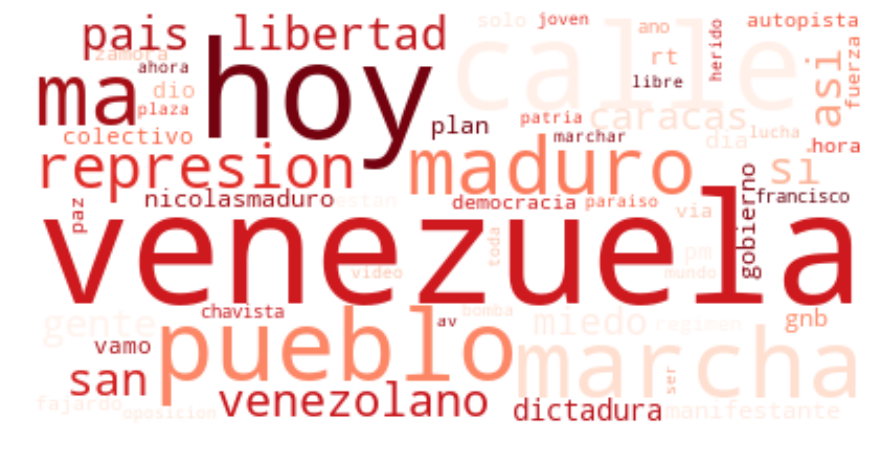

In [155]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");